# Comparative Analysis of Option Pricing: Binomial Tree Model vs. Black-Scholes-Merton Model


In [7]:
from scipy.stats import norm
from math import log, sqrt, exp
import numpy as np
import BinomialTree as bt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Using the binomial tree method to compute call option prices for up to 10K time steps. 

In [2]:
two_Step = bt.BinomialTree(S_0=10.0, T=0.25, K=10.0, r=0.02, u=None, d=None, N=2, usesCoxRosenstein=True, sigma=0.25)
ten_Step = bt.BinomialTree(S_0=10.0, T=0.25, K=10.0, r=0.02, u=None, d=None, N=10, usesCoxRosenstein=True, sigma=0.25)
hund_Step = bt.BinomialTree(S_0=10.0, T=0.25, K=10.0, r=0.02, u=None, d=None, N=100, usesCoxRosenstein=True, sigma=0.25)
thous_Step = bt.BinomialTree(S_0=10.0, T=0.25, K=10.0, r=0.02, u=None, d=None, N=1000, usesCoxRosenstein=True, sigma=0.25)
ten_thous_Step = bt.BinomialTree(S_0=10.0, T=0.25, K=10.0, r=0.02, u=None, d=None, N=10000, usesCoxRosenstein=True, sigma=0.25)
bin_prices = {
    "2 Step": two_Step.option_price(derivative_type='call'),
    "10 Step": ten_Step.option_price(derivative_type='call'),
    "100 Step": hund_Step.option_price(derivative_type='call'),
    "1000 Step": thous_Step.option_price(derivative_type='call'),
    "10000 Step": ten_thous_Step.option_price(derivative_type='call'),
}
bs_prices = {
    "2 Step": bt.black_scholes_call_price(S=10.0, K=10.0, T=0.25, r=0.02, sigma=0.25),
    "10 Step": bt.black_scholes_call_price(S=10.0, K=10.0, T=0.25, r=0.02, sigma=0.25),
    "100 Step": bt.black_scholes_call_price(S=10.0, K=10.0, T=0.25, r=0.02, sigma=0.25),
    "1000 Step": bt.black_scholes_call_price(S=10.0, K=10.0, T=0.25, r=0.02, sigma=0.25),
    "10000 Step": bt.black_scholes_call_price(S=10.0, K=10.0, T=0.25, r=0.02, sigma=0.25),
}

# Comparing Prices

In [11]:
errors = []
for i in range(1, 6):
    key = list(bin_prices.keys())[i-1]
    diff = abs(bin_prices[key]  - bs_prices[key])
    errors.append(diff)
    print(f"{key:12} | {bin_prices[key]:21.6f} | {bs_prices[key]:19.6f} | {diff}" )

2 Step       |              0.465800 |            0.522445 | 0.056645327643632504
10 Step      |              0.510200 |            0.522445 | 0.012245327643632509
100 Step     |              0.521100 |            0.522445 | 0.001345327643632488
1000 Step    |              0.513200 |            0.522445 | 0.009245327643632506
10000 Step   |              0.214500 |            0.522445 | 0.30794532764363247


# Plotting The Difference

Least squares fit: ln|E| = 0.167961ln(N) + -4.746002
A = 0.167961
B = -4.746002
R² = 0.079553


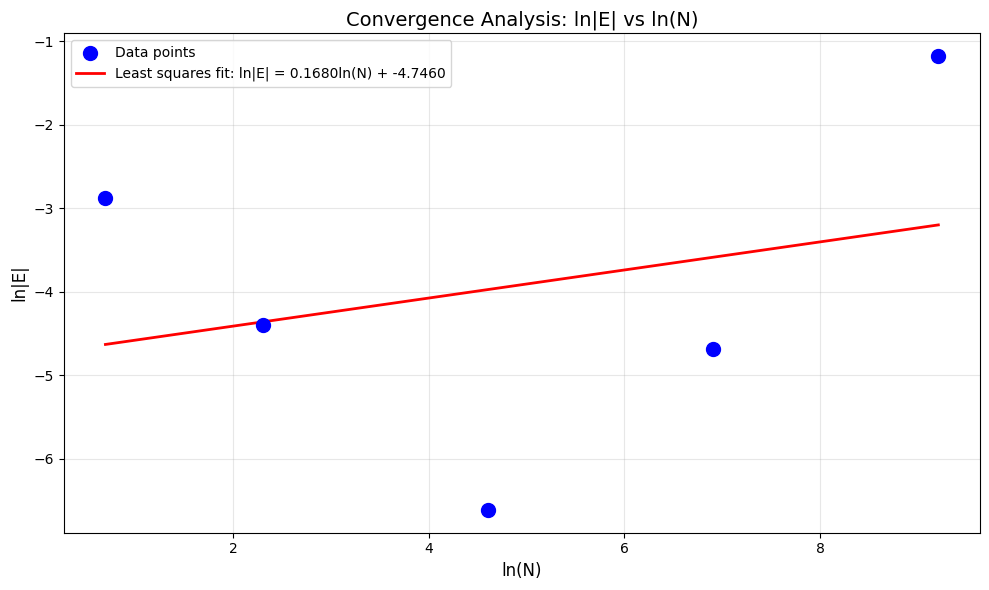

In [12]:
N_values = [2,10,100,1000,10000]
# Compute ln values
ln_N = np.log(N_values)
ln_E = np.log(errors)

# Perform least squares linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(ln_N, ln_E)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(ln_N, ln_E, color='blue', s=100, label='Data points', zorder=3)
plt.plot(ln_N, slope * ln_N + intercept, color='red', linewidth=2, 
         label=f'Least squares fit: ln|E| = {slope:.4f}ln(N) + {intercept:.4f}')

plt.xlabel('ln(N)', fontsize=12)
plt.ylabel('ln|E|', fontsize=12)
plt.title('Convergence Analysis: ln|E| vs ln(N)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()

# Print results
print(f"Least squares fit: ln|E| = {slope:.6f}ln(N) + {intercept:.6f}")
print(f"A = {slope:.6f}")
print(f"B = {intercept:.6f}")
print(f"R² = {r_value**2:.6f}")

plt.show()